This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [17]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
#MESH = 'TRI06-SUPERFINE-ITFW'
#MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

In [18]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Problem = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [19]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Problem.FIXED_BOUNDARY = False
Problem.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Problem.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Problem.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Problem.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Problem.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Problem.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [20]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Problem.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Problem.EXT_ITER = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Problem.EXT_TOL = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Problem.INT_ITER = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Problem.INT_TOL = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Problem.PLASMA_IT = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Problem.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Problem.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Problem.PSIrelax = False
Problem.alphaPSI = 1.0          # INITIAL AIKITEN'S RELAXATION PARAMETER
Problem.PHIrelax = False
Problem.alphaPHI = 0.5
Problem.EXTR_R0 = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.EXTR_Z0 = 1.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.SADD_R0 = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Problem.SADD_Z0 = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Problem.OPTI_ITMAX = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Problem.OPTI_TOL = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [21]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Problem.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Problem.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Problem.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Problem.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Problem.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Problem.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Problem.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Problem.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Problem.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

In [22]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Problem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

"\ndef PHI0(X):\n    return\nProblem.initialPHI = InitialPlasmaBoundary(PROBLEM = Problem,\n                                           GEOMETRY = 'OTHER',\n                                           PHI0 = PHI0)\n"

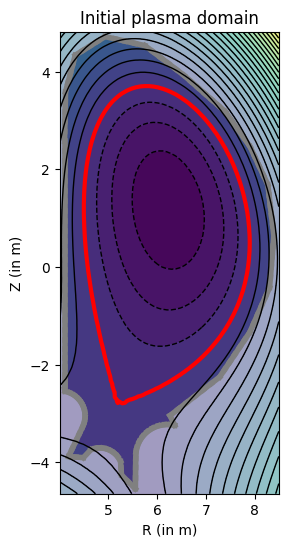

In [23]:
Problem.initialPHI.Plot()

In [24]:
Problem.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017036638942055492 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1968502217357368 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·5.080004437802759
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


In [25]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.2, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Problem.initialPSI = InitialGuess(PROBLEM = Problem,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

"\ndef PSI0(X):\n    return\nProblem.initialPSI = InitialGuess(PROBLEM = Problem,\n                                  PSI_GUESS = 'OTHER',\n                                  PSI0 = PSI0)\n"

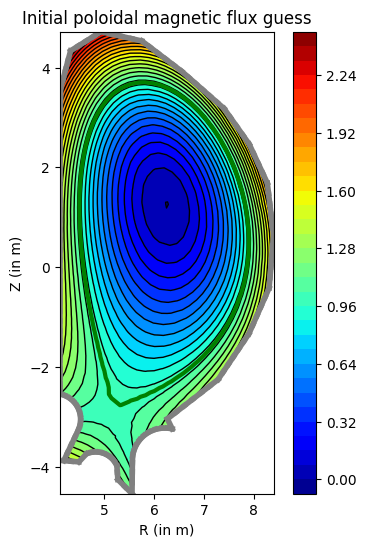

In [26]:
Problem.initialPSI.Plot()

In [27]:
Problem.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


In [28]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Problem.mu0*(R0**2)*q0*kappa)

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Problem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

In [29]:
Problem.IntegratePlasmaDomain(Problem.PlasmaCurrent.Jphi)

15000000.000000037

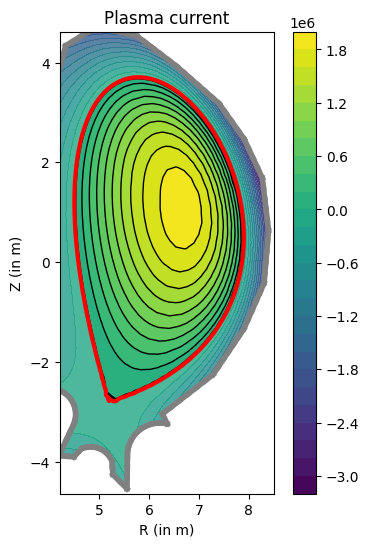

In [30]:
Problem.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


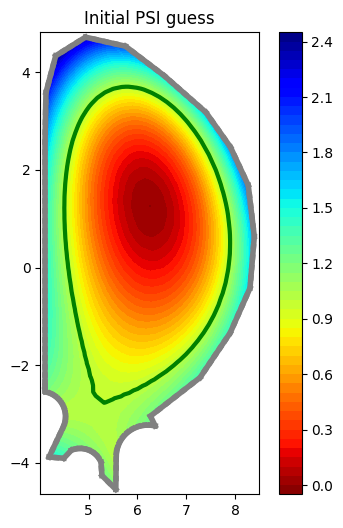

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  15000000.000000037
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.38744494, 0.82824485]), -9.825111383533692, 1097)]
Xpoint =  [(array([ 4.97270531, -3.16202709]), 0.6780065689571237, 185)]
LOCAL EXTREMUM AT  [6.38744494 0.82824485]  (ELEMENT  1097 ) WITH VALUE PSI_0 =  -9.825111383533692
SADDLE POINT AT  [ 4.97270531 -3.16202709]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6780065689571237


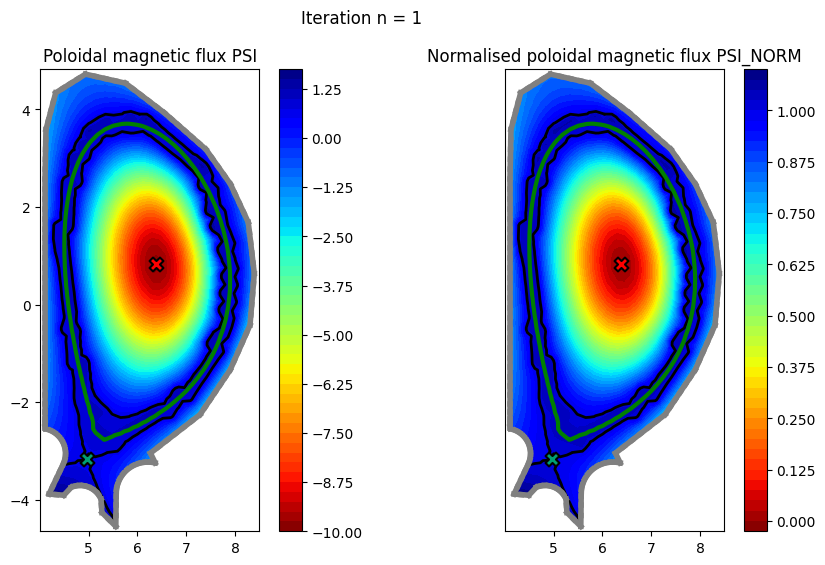

Internal iteration =  1 , PSI_NORM residu =  0.44453982550575905
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.0
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.45854695, 0.72423414]), -14.030752814926998, 1099)]
Xpoint =  [(array([ 4.96101745, -3.17692923]), 0.6724434928810133, 185)]
LOCAL EXTREMUM AT  [6.45854695 0.72423414]  (ELEMENT  1099 ) WITH VALUE PSI_0 =  -14.030752814926998
SADDLE POINT AT  [ 4.96101745 -3.17692923]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6724434928810133


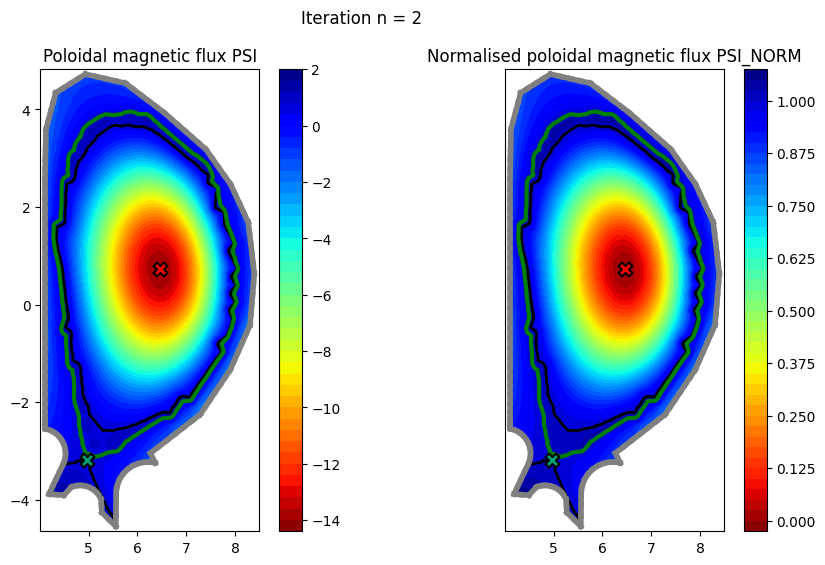

Internal iteration =  2 , PSI_NORM residu =  0.0763421761329065
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000034
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50122162, 0.66895501]), -12.750263656628581, 1560)]
Xpoint =  [(array([ 4.96211523, -3.17596749]), 0.6667977265058904, 185)]
LOCAL EXTREMUM AT  [6.50122162 0.66895501]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.750263656628581
SADDLE POINT AT  [ 4.96211523 -3.17596749]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6667977265058904


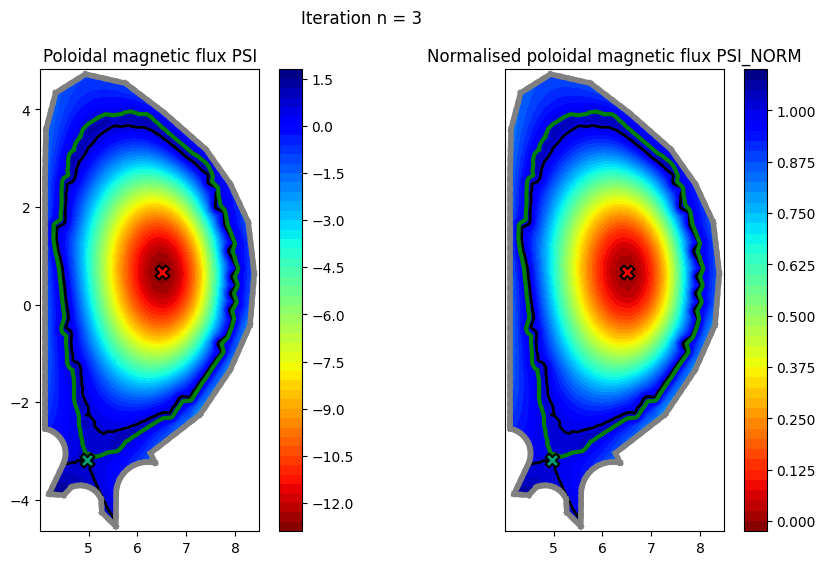

Internal iteration =  3 , PSI_NORM residu =  0.018678313073352215
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  15000000.000000011
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51654005, 0.63564285]), -12.657204615014926, 1560)]
Xpoint =  [(array([ 4.96341845, -3.17508914]), 0.661028319721155, 185)]
LOCAL EXTREMUM AT  [6.51654005 0.63564285]  (ELEMENT  1560 ) WITH VALUE PSI_0 =  -12.657204615014926
SADDLE POINT AT  [ 4.96341845 -3.17508914]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.661028319721155


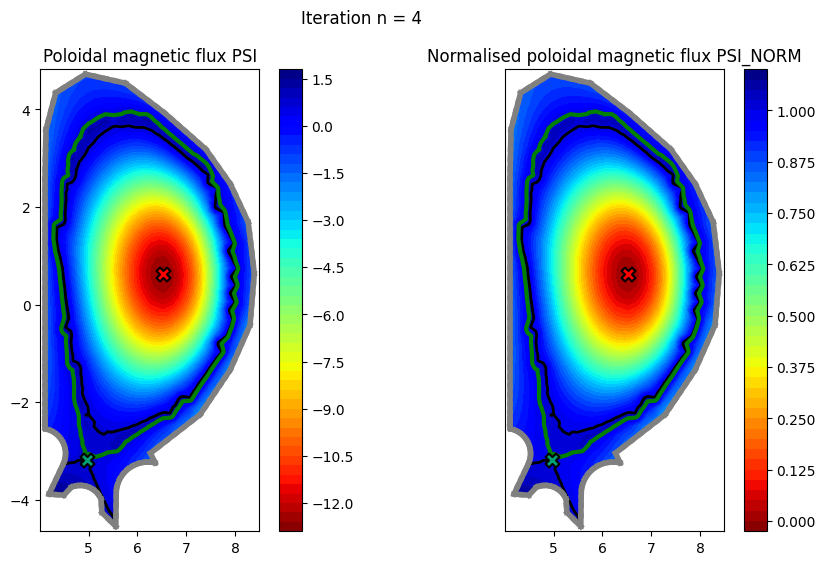

Internal iteration =  4 , PSI_NORM residu =  0.006787987447202199
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000004
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52130269, 0.61817839]), -12.6570797605346, 1461)]
Xpoint =  [(array([ 4.96476544, -3.17425362]), 0.6551251987997216, 185)]
LOCAL EXTREMUM AT  [6.52130269 0.61817839]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.6570797605346
SADDLE POINT AT  [ 4.96476544 -3.17425362]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6551251987997216


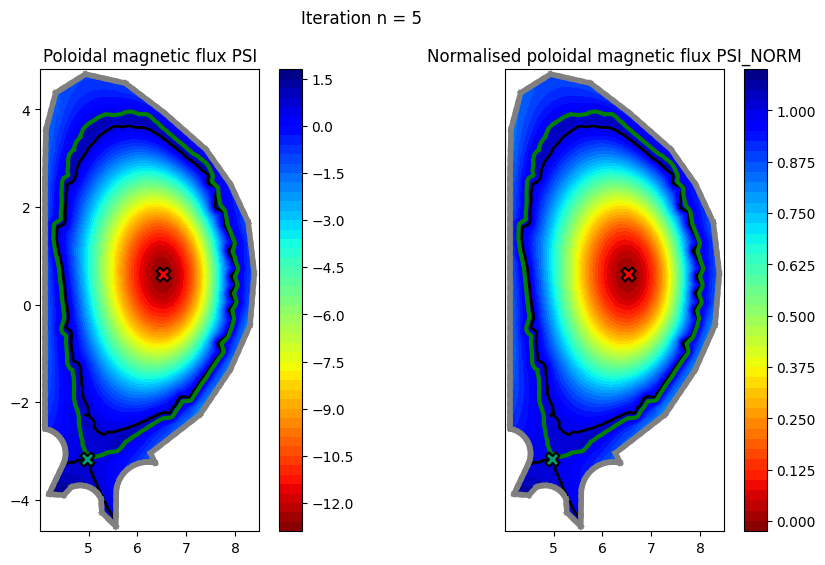

Internal iteration =  5 , PSI_NORM residu =  0.003089392142289133
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.999999981
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52284693, 0.60925315]), -12.666055596126984, 1461)]
Xpoint =  [(array([ 4.96614519, -3.17345578]), 0.6490806638754175, 185)]
LOCAL EXTREMUM AT  [6.52284693 0.60925315]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.666055596126984
SADDLE POINT AT  [ 4.96614519 -3.17345578]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6490806638754175


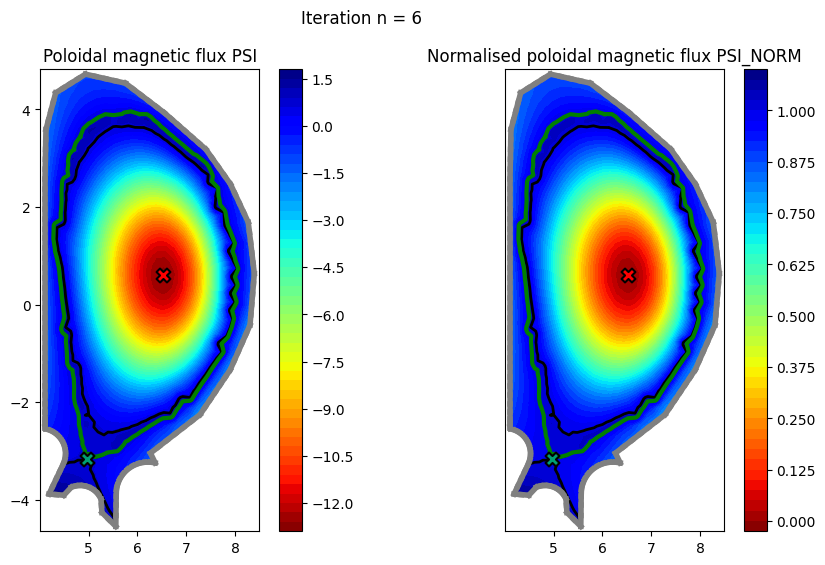

Internal iteration =  6 , PSI_NORM residu =  0.00149618297981334
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  14999999.999999795
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52333371, 0.60480298]), -12.674001725803516, 1461)]
Xpoint =  [(array([ 4.96755385, -3.17269253]), 0.6428880136531812, 185)]
LOCAL EXTREMUM AT  [6.52333371 0.60480298]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.674001725803516
SADDLE POINT AT  [ 4.96755385 -3.17269253]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6428880136531812


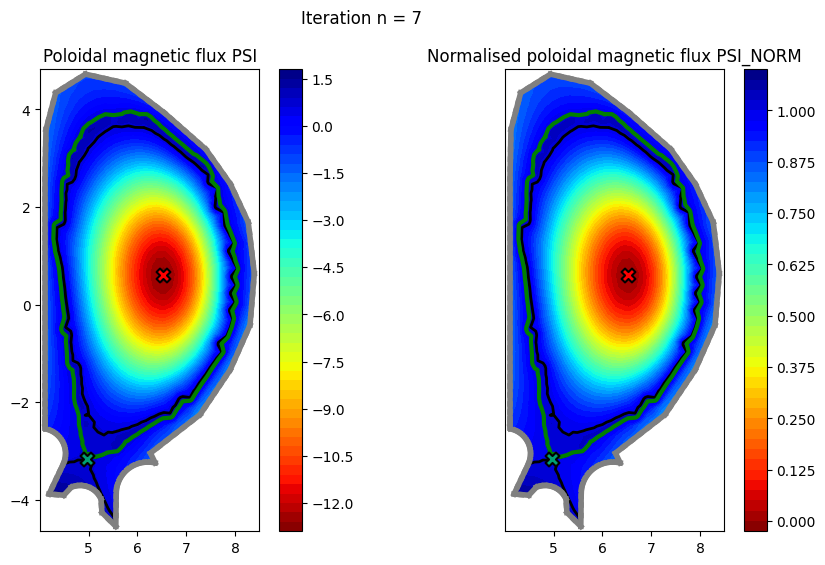

Internal iteration =  7 , PSI_NORM residu =  0.0007600181401233638
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000069
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52348333, 0.60263404]), -12.680819784584296, 1461)]
Xpoint =  [(array([ 4.96898991, -3.17196151]), 0.6365411165863887, 185)]
LOCAL EXTREMUM AT  [6.52348333 0.60263404]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.680819784584296
SADDLE POINT AT  [ 4.96898991 -3.17196151]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6365411165863887


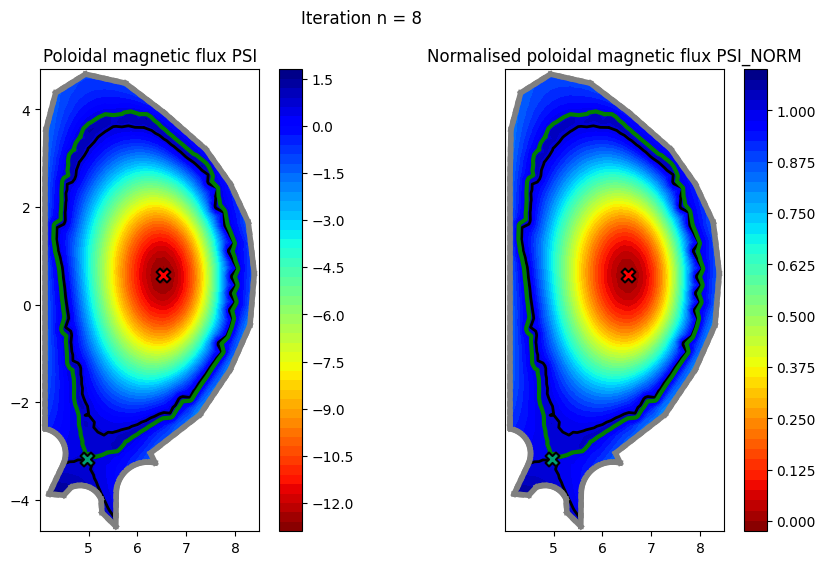

Internal iteration =  8 , PSI_NORM residu =  0.000440182023970854
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.99999992
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52352293, 0.60161348]), -12.68710285423757, 1461)]
Xpoint =  [(array([ 4.97045287, -3.17126058]), 0.6300342190357108, 185)]
LOCAL EXTREMUM AT  [6.52352293 0.60161348]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.68710285423757
SADDLE POINT AT  [ 4.97045287 -3.17126058]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6300342190357108


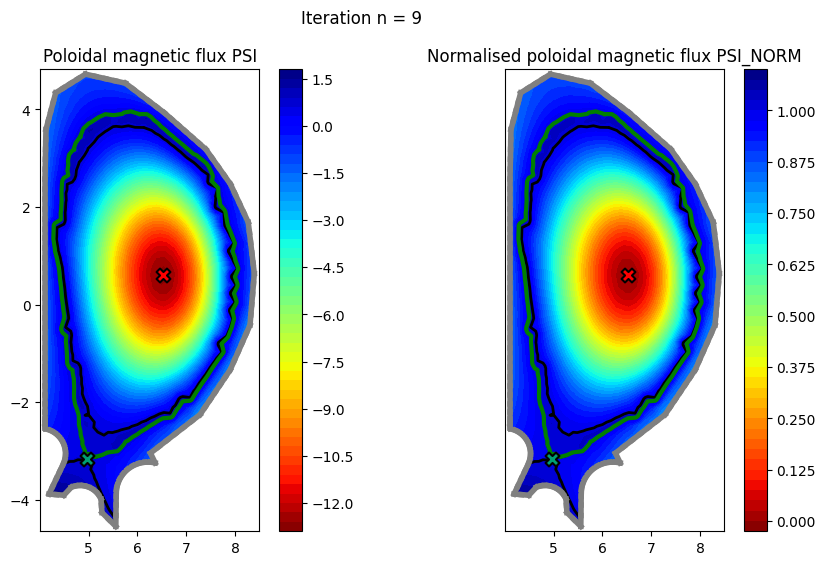

Internal iteration =  9 , PSI_NORM residu =  0.00033052685333499055
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Total current =  15000000.000000067
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52352389, 0.60116746]), -12.693214028545597, 1461)]
Xpoint =  [(array([ 4.97194276, -3.17058762]), 0.6233618729481499, 185)]
LOCAL EXTREMUM AT  [6.52352389 0.60116746]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.693214028545597
SADDLE POINT AT  [ 4.97194276 -3.17058762]  (ELEMENT  185 ) WITH VALUE PSI_X =  0.6233618729481499


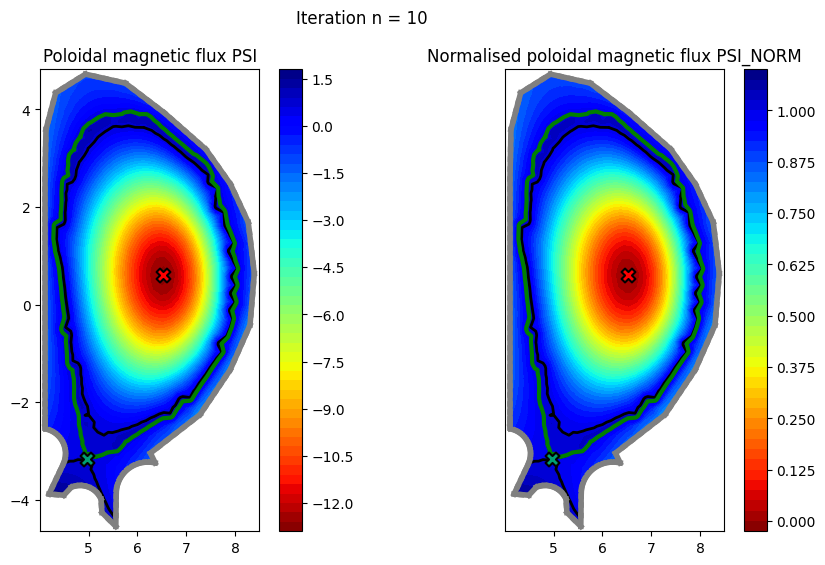

Internal iteration =  10 , PSI_NORM residu =  0.0003079398852243151
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.8137330461179733
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.000000134
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52825326, 0.5925007 ]), -12.733858545982411, 1461)]
Xpoint =  [(array([ 5.07728877, -3.08779515]), 0.6257601378979227, 300)]
LOCAL EXTREMUM AT  [6.52825326 0.5925007 ]  (ELEMENT  1461 ) WITH VALUE PSI_0 =  -12.733858545982411
SADDLE POINT AT  [ 5.07728877 -3.08779515]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6257601378979227


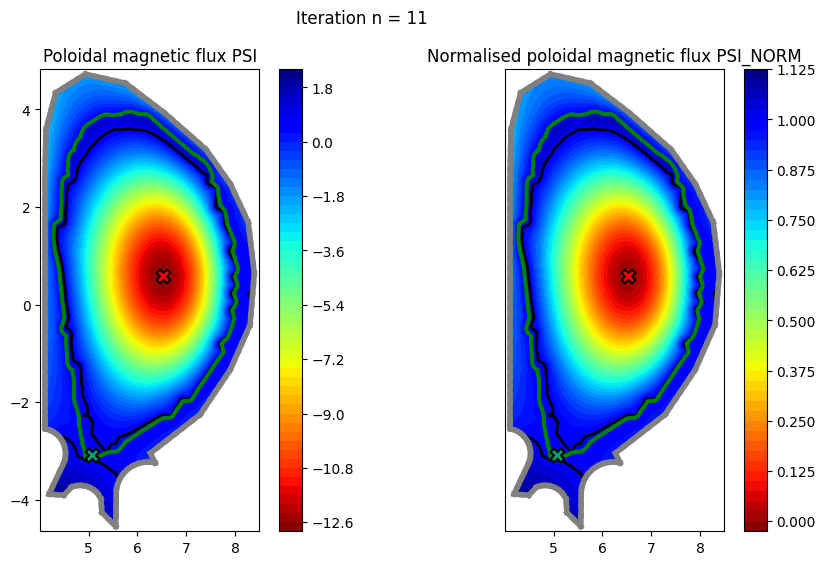

Internal iteration =  1 , PSI_NORM residu =  0.04756040461062897
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999834
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53061444, 0.58399403]), -12.720692894957649, 1277)]
Xpoint =  [(array([ 5.07771478, -3.08870401]), 0.6280006155384277, 300)]
LOCAL EXTREMUM AT  [6.53061444 0.58399403]  (ELEMENT  1277 ) WITH VALUE PSI_0 =  -12.720692894957649
SADDLE POINT AT  [ 5.07771478 -3.08870401]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6280006155384277


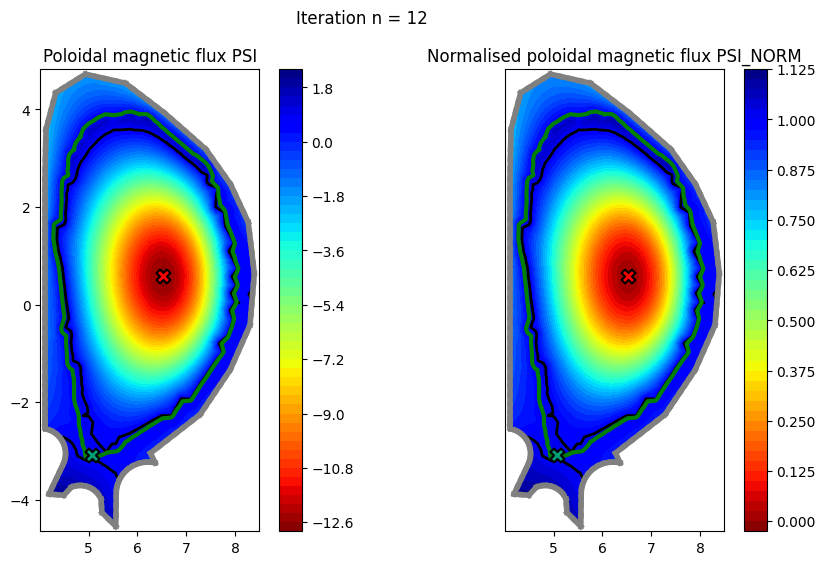

Internal iteration =  2 , PSI_NORM residu =  0.002211138815996712
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  15000000.000000069
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53144354, 0.57849591]), -12.720016884873168, 1277)]
Xpoint =  [(array([ 5.07775934, -3.08909669]), 0.6301618605035397, 300)]
LOCAL EXTREMUM AT  [6.53144354 0.57849591]  (ELEMENT  1277 ) WITH VALUE PSI_0 =  -12.720016884873168
SADDLE POINT AT  [ 5.07775934 -3.08909669]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6301618605035397


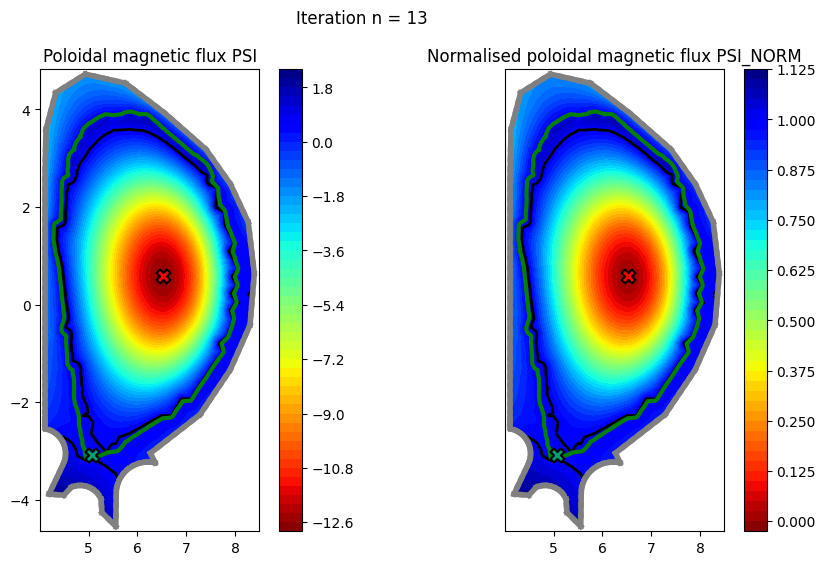

Internal iteration =  3 , PSI_NORM residu =  0.0010446486166123398
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Total current =  14999999.9999996
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.53171671, 0.57544059]), -12.718570813068904, 1277)]
Xpoint =  [(array([ 5.07775388, -3.08941786]), 0.6322545425232187, 300)]
LOCAL EXTREMUM AT  [6.53171671 0.57544059]  (ELEMENT  1277 ) WITH VALUE PSI_0 =  -12.718570813068904
SADDLE POINT AT  [ 5.07775388 -3.08941786]  (ELEMENT  300 ) WITH VALUE PSI_X =  0.6322545425232187


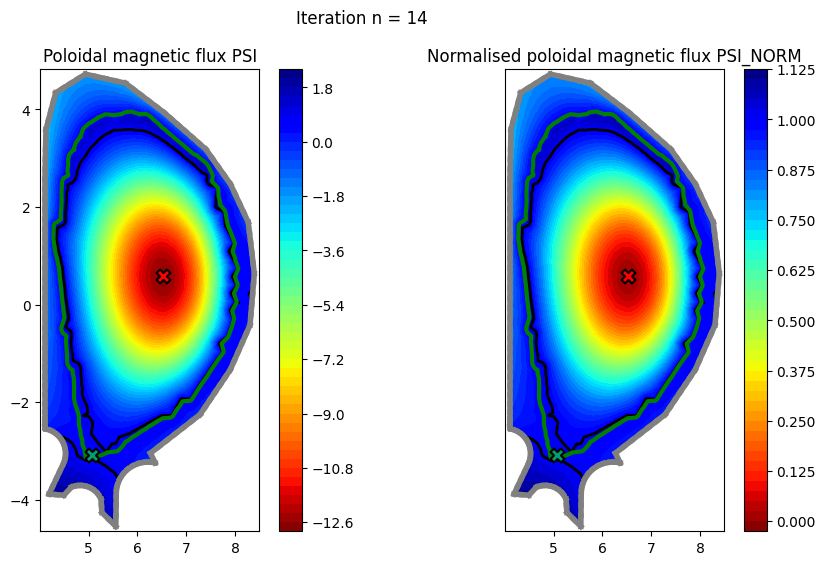

KeyboardInterrupt: 

In [31]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI(CASE)

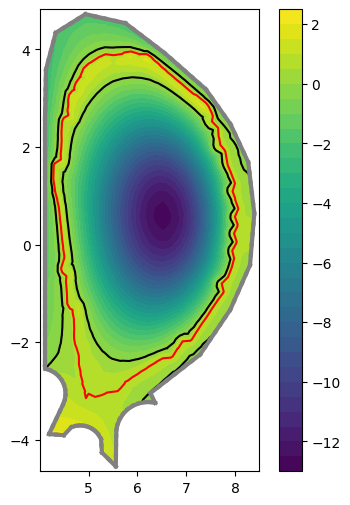

In [ ]:
Problem.PlotPSI()

In [ ]:
self = Problem

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])


In [ ]:
np.linalg.norm(np.array(self.PSI_B_sim[0])-np.array(self.PSI_B_sim[1]))

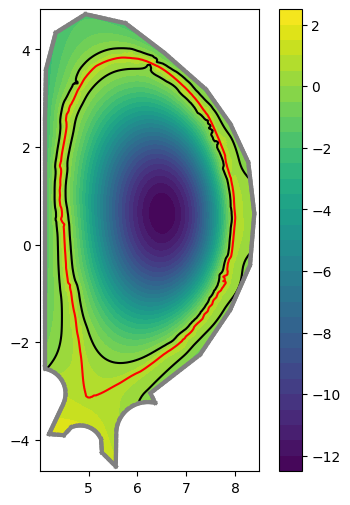

In [ ]:
Problem.PlotPSI()